In [32]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# from google.colab import files
# uploaded = files.upload()

In [34]:
#  !mv dataset.csv data/processed/

In [35]:
# define and create paths
# get working directory
project_root_dir = os.getcwd()
#define paths to the data folders
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define paths to docs folder
docs_dir = os.path.join(project_root_dir,'docs')
# define paths to result folder
result_dir = os.path.join(project_root_dir,'results')
# create directories if they do not exist
os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)

In [36]:
real_estate_filename = os.path.join(processed_dir,'dataset.csv')
real_estate = pd.read_csv(real_estate_filename)
real_estate.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,160091,2016,12/23/2016,avon,2 edgewood,143390,224000.0,0.640134,condo,appartments
1,160172,2016,4/13/2017,bethel,66 h nashville road,80500,130000.0,0.619231,condo,appartments
2,160258,2016,6/29/2017,bethel,1 eagle rock hill,117180,200000.0,0.585900,condo,appartments
3,16233,2016,6/9/2017,darien,54 kensett lane,887600,1495000.0,0.593712,condo,appartments
4,1600249,2016,5/12/2017,guilford,66-10 high st,409250,665000.0,0.615414,condo,appartments
5,160103,2016,11/30/2016,branford,137 peddlars dr,106700,155000.0,0.688387,condo,appartments
6,167930,2016,9/27/2017,bridgeport,95 lance cir,105820,148000.0,0.715000,condo,appartments
7,16533,2016,8/3/2017,newington,239 sterling dr,238150,331100.0,0.719269,condo,appartments
8,16005,2016,10/11/2016,durham,83 stagecoach rd,114590,160000.0,0.716187,condo,appartments
9,160239,2016,6/9/2017,new canaan,29 maple st #3,388640,436000.0,0.891376,condo,appartments


In [37]:

real_estate['Sale Amount'].describe()

,Sale Amount
count,1.832770e+05
mean,3.584544e+05
std,7.790676e+05
min,0.000000e+00
25%,1.520000e+05
50%,2.350000e+05
75%,3.650000e+05
max,1.570000e+08


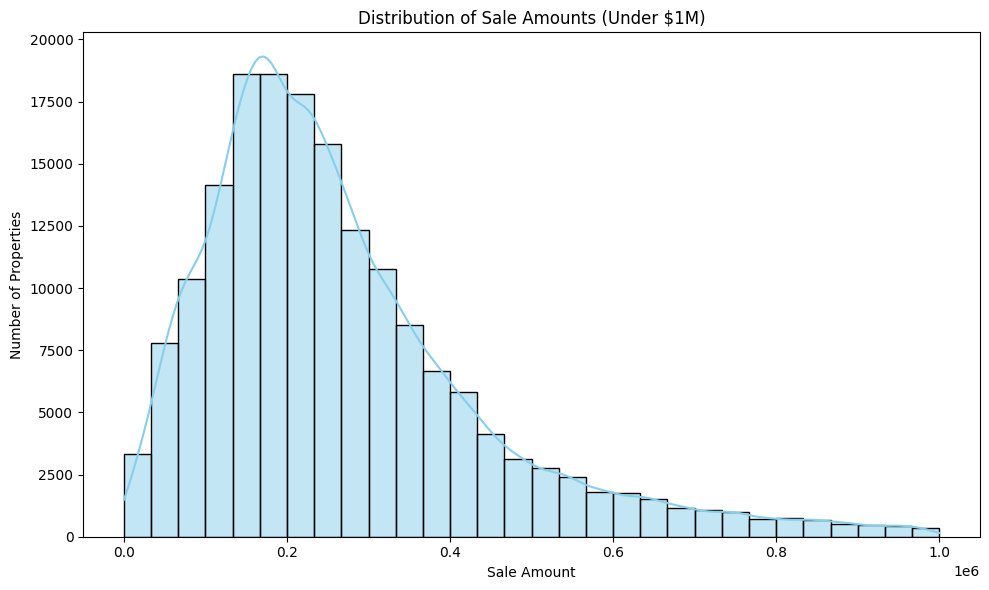

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(real_estate[real_estate['Sale Amount'] < 1_000_000]['Sale Amount'],
             bins=30, kde=True, color='skyblue')

plt.title('Distribution of Sale Amounts (Under $1M)')
plt.xlabel('Sale Amount')
plt.ylabel('Number of Properties')
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(result_dir, 'Distribution_of_Sale_Amounts_Under_1M.jpg'))
plt.savefig(os.path.join(result_dir, 'Distribution_of_Sale_Amounts_Under_1M.png'))

plt.show()

/tmp/ipython-input-41-2913805280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=real_estate,


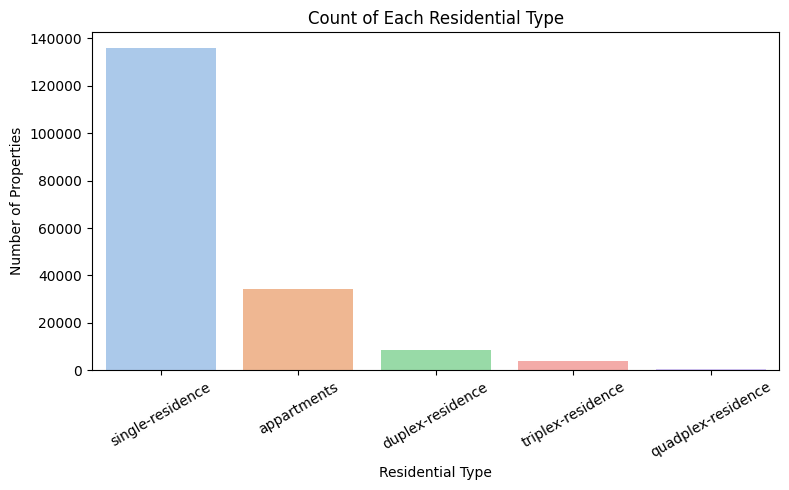

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(data=real_estate,
              x='Residential Type',
              order=real_estate['Residential Type'].value_counts().index,
              palette='pastel')

plt.title('Count of Each Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=30)
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(result_dir, 'Count_of_Each_Residential_Type.jpg'))
plt.savefig(os.path.join(result_dir, 'Count_of_Each_Residential_Type.png'))

plt.show()

In [42]:
real_estate['Sales Ratio'].describe()

,Sales Ratio
count,183277.000000
mean,3.134847
std,657.139410
min,0.000000
25%,0.589900
50%,0.667100
75%,0.782949
max,241910.000000


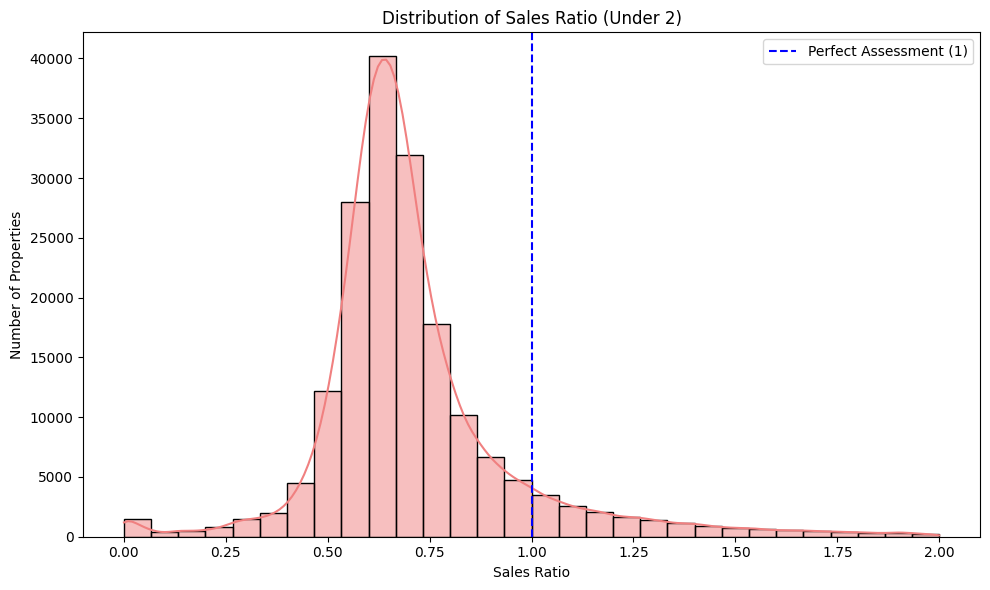

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(real_estate[real_estate['Sales Ratio'] < 2]['Sales Ratio'], bins=30, kde=True, color='lightcoral')

plt.title('Distribution of Sales Ratio (Under 2)')
plt.xlabel('Sales Ratio')
plt.ylabel('Number of Properties')
plt.axvline(1, color='blue', linestyle='--', label='Perfect Assessment (1)')
plt.legend()
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(result_dir, 'Distribution_of_Sales_Ratio_Under_2.jpg'))
plt.savefig(os.path.join(result_dir, 'Distribution_of_Sales_Ratio_Under_2.png'))

plt.show()

/tmp/ipython-input-44-1375451909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=real_estate, x='Town', order=top_towns, palette='muted')


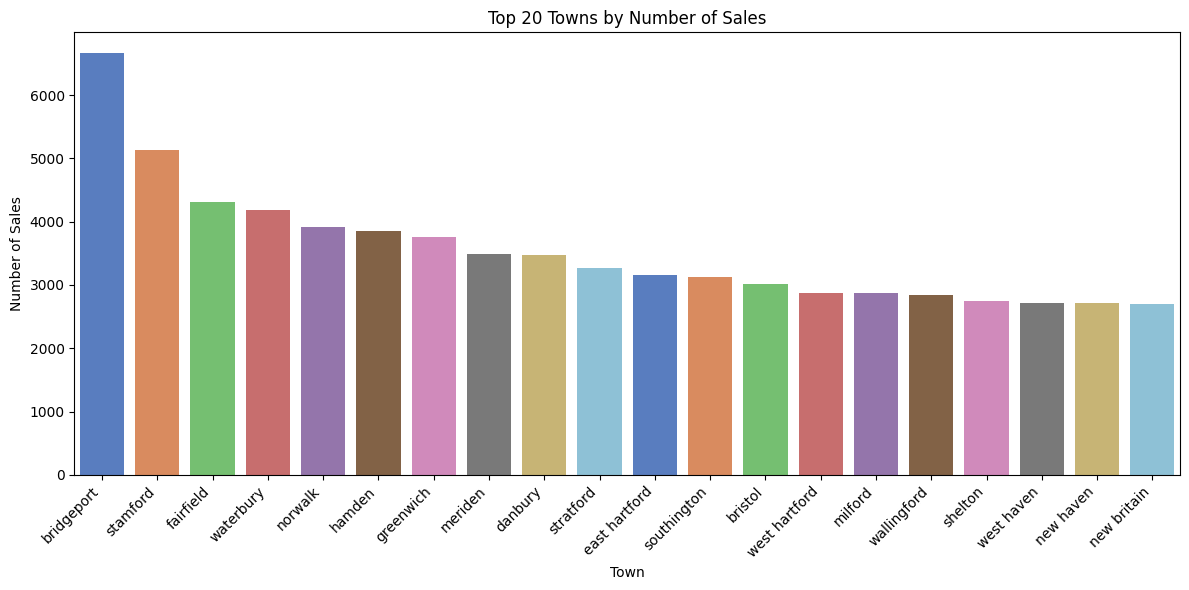

In [44]:
plt.figure(figsize=(12, 6))

# Get top 20 towns by count
top_towns = real_estate['Town'].value_counts().nlargest(20).index

sns.countplot(data=real_estate, x='Town', order=top_towns, palette='muted')

plt.title('Top 20 Towns by Number of Sales')
plt.xlabel('Town')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(result_dir, 'Top_20_Towns_by_Number_of_Sales.jpg'))
plt.savefig(os.path.join(result_dir, 'Top_20_Towns_by_Number_of_Sales.png'))

plt.show()

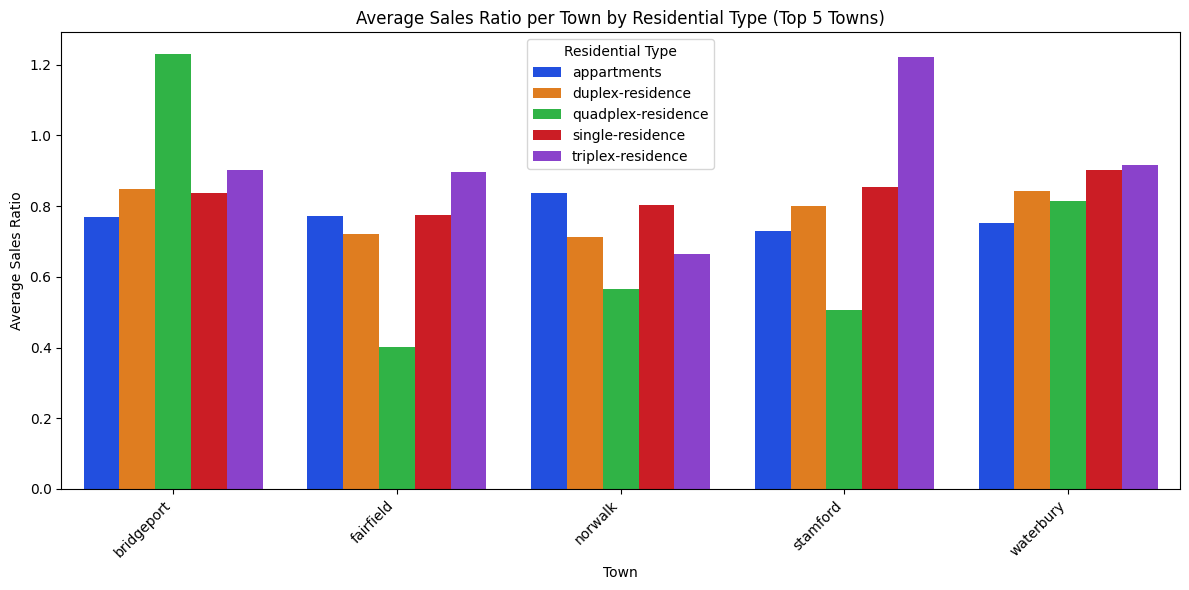

In [46]:
# Calculate average sales ratio by Town and Residential_Category
avg_sales_ratio = real_estate.groupby(['Town', 'Residential Type'])['Sales Ratio'].mean().reset_index()

# Select top 5 towns by number of sales
top_towns = real_estate['Town'].value_counts().nlargest(5).index
avg_sales_ratio_top = avg_sales_ratio[avg_sales_ratio['Town'].isin(top_towns)]

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_ratio_top, x='Town', y='Sales Ratio', hue='Residential Type', palette='bright')

plt.title('Average Sales Ratio per Town by Residential Type (Top 5 Towns)')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residential Type')
plt.tight_layout()
plt.show
plt.savefig(os.path.join(result_dir, 'income_distribution_by_agegroup_bar_plot.jpg'))
plt.savefig(os.path.join(result_dir, 'income_distribution_by_agegroup_bar_plot.png'))

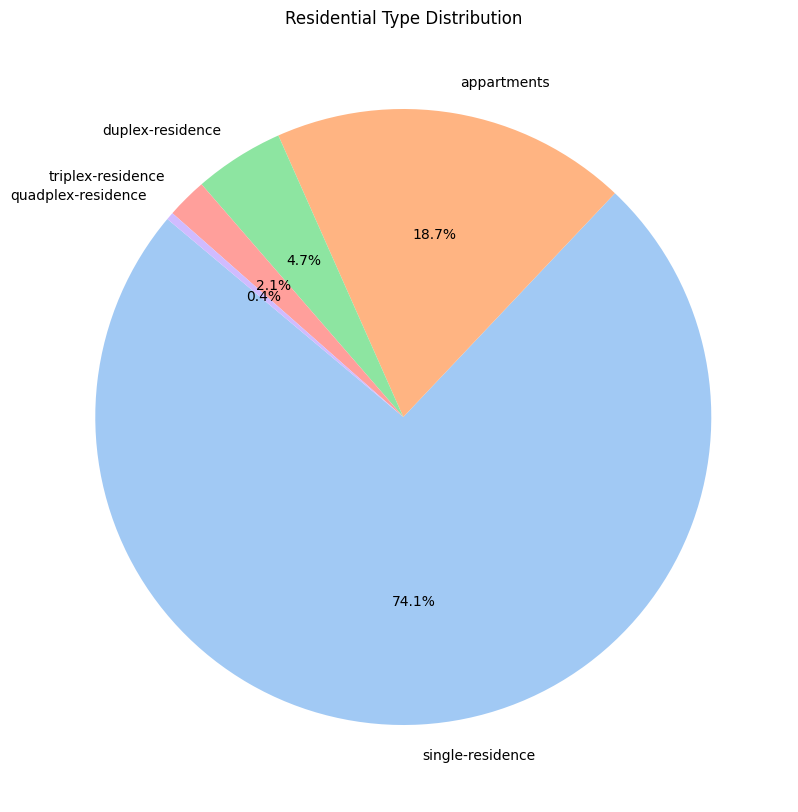

In [59]:
# Count residential categories
res_cat_counts = real_estate['Residential Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(res_cat_counts, labels=res_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Residential Type Distribution')

# Save as image
plt.savefig(os.path.join(result_dir, 'Residential_Category_Distribution.jpg'))
plt.savefig(os.path.join(result_dir, 'Residential_Category_Distribution.png'))

plt.show()